# Aadhaar Demographic Data Analysis
## UIDAI Hackathon - Data Analysis Notebook
---

### Step 1: Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os

# Set style for better looking charts
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

print('✅ Libraries imported successfully!')

✅ Libraries imported successfully!


### Step 2: Extract the Dataset

In [4]:
zip_path = "aadhaar-hackathon.zip"
extract_path = "data"

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f'✅ Dataset extracted to: {extract_path}')

# List extracted files
for root, dirs, files in os.walk(extract_path):
    for file in files:
        print(f'  - {os.path.join(root, file)}')

✅ Dataset extracted to: data
  - data/api_data_aadhar_demographic/api_data_aadhar_demographic_1500000_2000000.csv
  - data/api_data_aadhar_demographic/api_data_aadhar_demographic_1000000_1500000.csv
  - data/api_data_aadhar_demographic/api_data_aadhar_demographic_2000000_2071700.csv
  - data/api_data_aadhar_demographic/api_data_aadhar_demographic_0_500000.csv
  - data/api_data_aadhar_demographic/api_data_aadhar_demographic_500000_1000000.csv


### Step 3: Load CSV Files into DataFrame

In [5]:
files = []
for root, dirs, filenames in os.walk("data"):
    for f in filenames:
        if f.endswith(".csv"):
            files.append(os.path.join(root, f))

print(f'Found {len(files)} CSV files')

# Load and combine all CSV files
df = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)

print(f'\n✅ Loaded {len(df)} rows of data')
print(f'\nColumns: {list(df.columns)}')

Found 5 CSV files

✅ Loaded 2071700 rows of data

Columns: ['date', 'state', 'district', 'pincode', 'demo_age_5_17', 'demo_age_17_']


### Step 4: Explore the Data

In [6]:
# View first few rows
df.head()

,date,state,district,pincode,demo_age_5_17,demo_age_17_
0,18-11-2025,Karnataka,Hasan,573118,0,2
1,18-11-2025,Karnataka,Hasan,573124,1,3
2,18-11-2025,Karnataka,Hasan,573150,0,2
3,18-11-2025,Karnataka,Hassan,573113,0,1
4,18-11-2025,Karnataka,Hassan,573120,1,4


In [7]:
# Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2071700 entries, 0 to 2071699
Data columns (total 6 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   date           object
 1   state          object
 2   district       object
 3   pincode        int64 
 4   demo_age_5_17  int64 
 5   demo_age_17_   int64 
dtypes: int64(3), object(3)
memory usage: 94.8+ MB


In [8]:
# Statistical summary
df.describe()

,pincode,demo_age_5_17,demo_age_17_
count,2.071700e+06,2.071700e+06,2.071700e+06
mean,5.278318e+05,2.347552e+00,2.144701e+01
std,1.972933e+05,1.490355e+01,1.252498e+02
min,1.000000e+05,0.000000e+00,0.000000e+00
25%,3.964690e+05,0.000000e+00,2.000000e+00
50%,5.243220e+05,1.000000e+00,6.000000e+00
75%,6.955070e+05,2.000000e+00,1.500000e+01
max,8.554560e+05,2.690000e+03,1.616600e+04


### Step 5: Clean and Prepare Data

In [9]:
# Convert date column to datetime (adjust column name if different)
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], dayfirst=True)
    print('✅ Date column converted')

# Rename columns for clarity (adjust based on actual column names)
# df = df.rename(columns={
#     'demo_age_5_17': 'age_5_17',
#     'demo_age_17_': 'age_18_plus'
# })

print('\nCleaned column names:', list(df.columns))

✅ Date column converted

Cleaned column names: ['date', 'state', 'district', 'pincode', 'demo_age_5_17', 'demo_age_17_']


### Step 6: Generate Charts

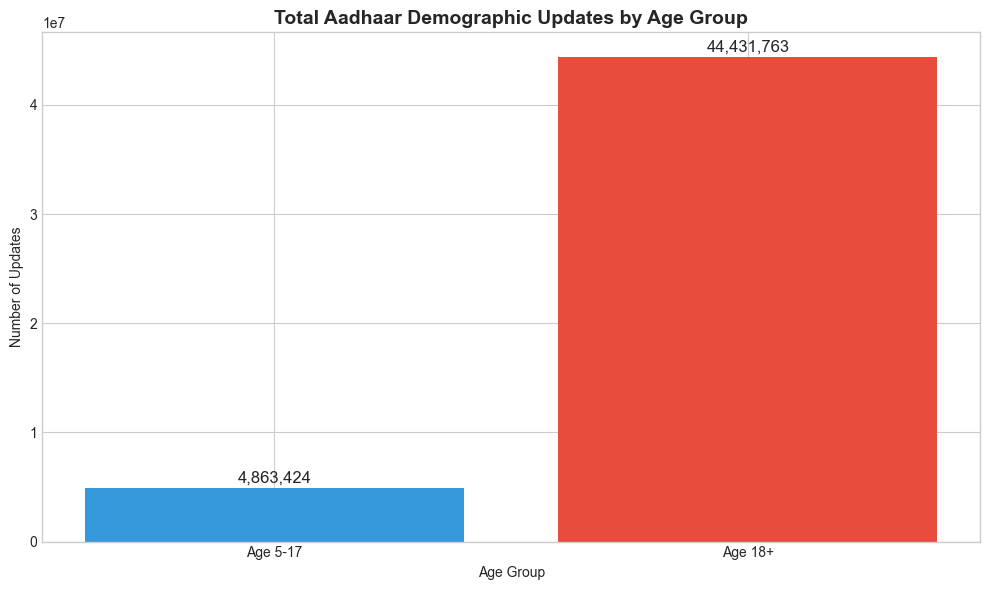

✅ Chart saved as age_group_updates.png


In [14]:
# Age Group Distribution Chart
age_summary = df[['demo_age_5_17', 'demo_age_17_']].sum()
age_summary.index = ['Age 5-17', 'Age 18+']

plt.figure(figsize=(10, 6))
plt.bar(age_summary.index, age_summary.values, color=['#3498db', '#e74c3c'])
plt.title('Total Aadhaar Demographic Updates by Age Group', fontsize=14, fontweight='bold')
plt.ylabel('Number of Updates')
plt.xlabel('Age Group')

# Add value labels on bars
for i, v in enumerate(age_summary.values):
    plt.text(i, v + 500000, f'{v:,.0f}', ha='center', fontsize=12)

plt.tight_layout()
plt.savefig('age_group_updates.png', dpi=300, bbox_inches='tight')
plt.show()
print('✅ Chart saved as age_group_updates.png')

### Step 7: More Visualizations

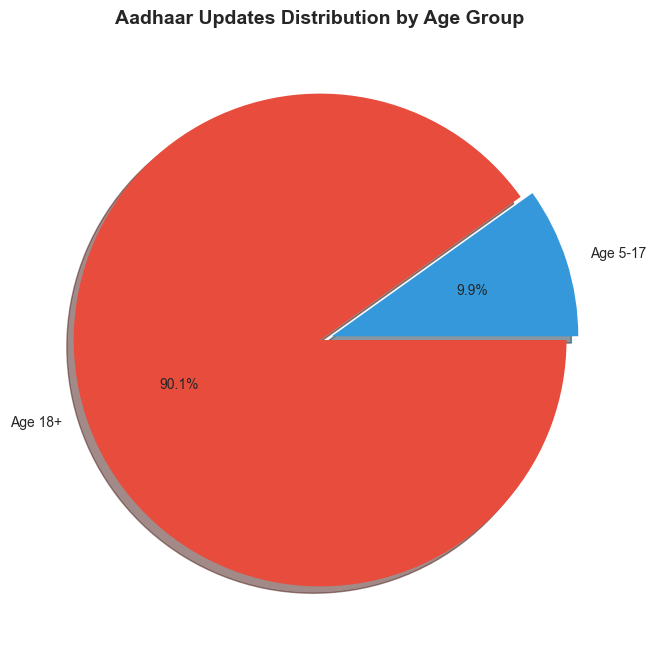

✅ Pie chart saved as age_distribution_pie.png


In [15]:
# Pie Chart - Age Distribution
plt.figure(figsize=(8, 8))
plt.pie(age_summary.values, labels=age_summary.index, autopct='%1.1f%%', 
        colors=['#3498db', '#e74c3c'], explode=(0.05, 0), shadow=True)
plt.title('Aadhaar Updates Distribution by Age Group', fontsize=14, fontweight='bold')
plt.savefig('age_distribution_pie.png', dpi=300, bbox_inches='tight')
plt.show()
print('✅ Pie chart saved as age_distribution_pie.png')

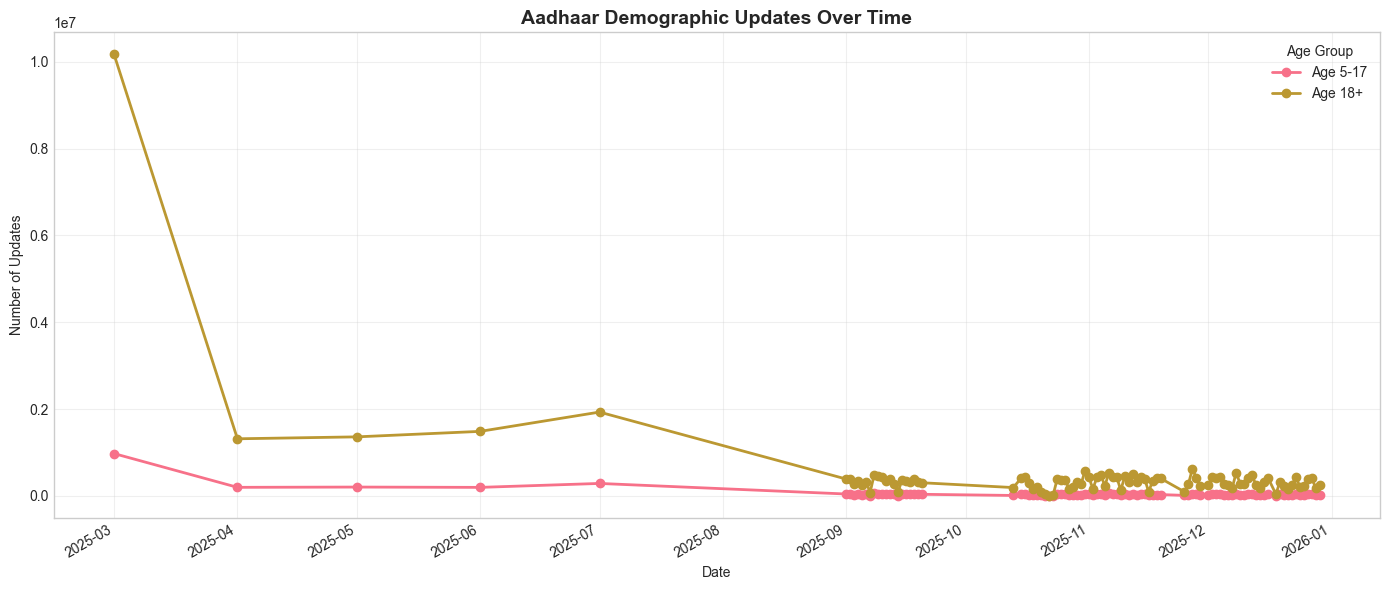

✅ Time series chart saved as time_series.png


In [16]:
# Time Series - Updates Over Time
daily_data = df.groupby('date')[['demo_age_5_17', 'demo_age_17_']].sum()
daily_data.columns = ['Age 5-17', 'Age 18+']

plt.figure(figsize=(14, 6))
daily_data.plot(ax=plt.gca(), marker='o', linewidth=2)
plt.title('Aadhaar Demographic Updates Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Number of Updates')
plt.legend(title='Age Group')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('time_series.png', dpi=300, bbox_inches='tight')
plt.show()
print('✅ Time series chart saved as time_series.png')

---
## 💡 How to Explain This to the Jury

**If asked: "How did you do the analysis?"**

You say:
> "We used Python and Jupyter Notebook to clean, aggregate, and visualize anonymised Aadhaar demographic update data. The charts were generated programmatically to ensure reproducibility."

---